# TIP inversions of a quiescent filament (and other stuff too!)

In [1]:
import hazel
from astropy.io import fits 
import numpy as np
import matplotlib.pyplot as plt 
import h5py
from scipy.io import readsav

In [2]:
data = readsav('data/filament_ondisk.sav')

In [3]:
data.keys()

dict_keys(['lambda', 'heperf', 'landa_ref'])

In [4]:
print (data['lambda'])

[-3.74670345 -3.70300097 -3.65929849 -3.61559601 -3.57189353 -3.52819105
 -3.48448858 -3.4407861  -3.39708362 -3.35338114 -3.30967866 -3.26597618
 -3.22227371 -3.17857123 -3.13486875 -3.09116627 -3.04746379 -3.00376131
 -2.96005884 -2.91635636 -2.87265388 -2.8289514  -2.78524892 -2.74154644
 -2.69784397 -2.65414149 -2.61043901 -2.56673653 -2.52303405 -2.47933157
 -2.4356291  -2.39192662 -2.34822414 -2.30452166 -2.26081918 -2.2171167
 -2.17341423 -2.12971175 -2.08600927 -2.04230679 -1.99860431 -1.95490183
 -1.91119936 -1.86749688 -1.8237944  -1.78009192 -1.73638944 -1.69268696
 -1.64898449 -1.60528201 -1.56157953 -1.51787705 -1.47417457 -1.43047209
 -1.38676962 -1.34306714 -1.29936466 -1.25566218 -1.2119597  -1.16825722
 -1.12455475 -1.08085227 -1.03714979 -0.99344731 -0.94974483 -0.90604236
 -0.86233988 -0.8186374  -0.77493492 -0.73123244 -0.68752996 -0.64382749
 -0.60012501 -0.55642253 -0.51272005 -0.46901757 -0.42531509 -0.38161262
 -0.33791014 -0.29420766 -0.25050518 -0.2068027  -0.

In [6]:
print (data['lambda'])

[-3.74670345 -3.70300097 -3.65929849 -3.61559601 -3.57189353 -3.52819105
 -3.48448858 -3.4407861  -3.39708362 -3.35338114 -3.30967866 -3.26597618
 -3.22227371 -3.17857123 -3.13486875 -3.09116627 -3.04746379 -3.00376131
 -2.96005884 -2.91635636 -2.87265388 -2.8289514  -2.78524892 -2.74154644
 -2.69784397 -2.65414149 -2.61043901 -2.56673653 -2.52303405 -2.47933157
 -2.4356291  -2.39192662 -2.34822414 -2.30452166 -2.26081918 -2.2171167
 -2.17341423 -2.12971175 -2.08600927 -2.04230679 -1.99860431 -1.95490183
 -1.91119936 -1.86749688 -1.8237944  -1.78009192 -1.73638944 -1.69268696
 -1.64898449 -1.60528201 -1.56157953 -1.51787705 -1.47417457 -1.43047209
 -1.38676962 -1.34306714 -1.29936466 -1.25566218 -1.2119597  -1.16825722
 -1.12455475 -1.08085227 -1.03714979 -0.99344731 -0.94974483 -0.90604236
 -0.86233988 -0.8186374  -0.77493492 -0.73123244 -0.68752996 -0.64382749
 -0.60012501 -0.55642253 -0.51272005 -0.46901757 -0.42531509 -0.38161262
 -0.33791014 -0.29420766 -0.25050518 -0.2068027  -0.

In [7]:
print (data['landa_ref'])

10829.0911


In [8]:
cube = np.copy(data['heperf'])
cube.shape

(213, 4, 148, 165)

In [9]:
ll = np.copy(data['lambda']) + data['landa_ref']
print (ll)

[10825.34439655 10825.38809903 10825.43180151 10825.47550399
 10825.51920647 10825.56290895 10825.60661142 10825.6503139
 10825.69401638 10825.73771886 10825.78142134 10825.82512382
 10825.86882629 10825.91252877 10825.95623125 10825.99993373
 10826.04363621 10826.08733869 10826.13104116 10826.17474364
 10826.21844612 10826.2621486  10826.30585108 10826.34955356
 10826.39325603 10826.43695851 10826.48066099 10826.52436347
 10826.56806595 10826.61176843 10826.6554709  10826.69917338
 10826.74287586 10826.78657834 10826.83028082 10826.8739833
 10826.91768577 10826.96138825 10827.00509073 10827.04879321
 10827.09249569 10827.13619817 10827.17990064 10827.22360312
 10827.2673056  10827.31100808 10827.35471056 10827.39841304
 10827.44211551 10827.48581799 10827.52952047 10827.57322295
 10827.61692543 10827.66062791 10827.70433038 10827.74803286
 10827.79173534 10827.83543782 10827.8791403  10827.92284278
 10827.96654525 10828.01024773 10828.05395021 10828.09765269
 10828.14135517 10828.1850

In [10]:
ll.shape

(165,)

In [11]:
cube = cube.transpose(0,2,1,3)
cube.shape

(213, 148, 4, 165)

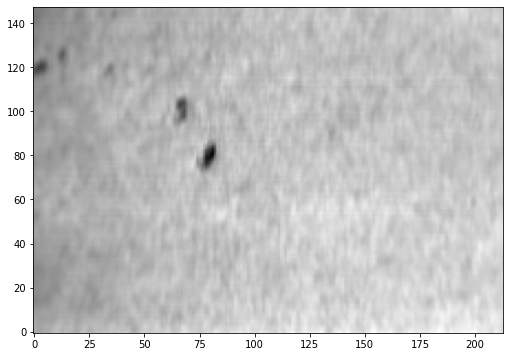

In [12]:
plt.figure(figsize=[9,6])
plt.imshow(cube[:,:,0,0].T,origin='lower',cmap='gray')

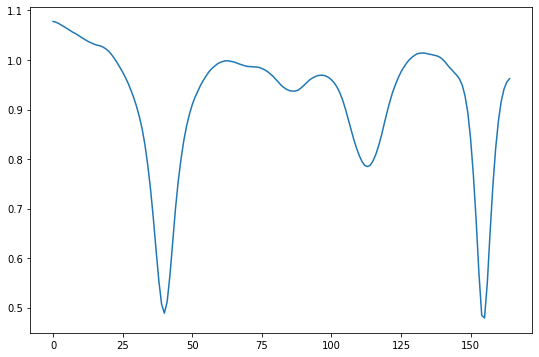

In [13]:
mean_spectrum = np.mean(cube,axis=(0,1))
plt.figure(figsize=[9,6])
plt.plot(mean_spectrum[0])

In [14]:
he_depth = np.sum(cube[:,:,0,130,None] - cube[:,:,0,105:130],axis=2)
he_depth.shape

(213, 148)

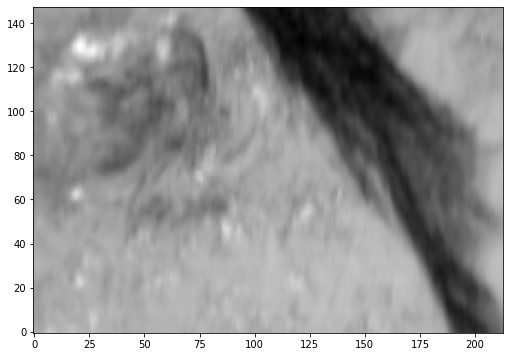

In [15]:
plt.figure(figsize=[9,6])
plt.imshow(-he_depth.T,origin='lower',cmap='gray')